In [1]:
import sys,tweepy,csv,re
from textblob import TextBlob 
import matplotlib.pyplot as plt

In [11]:
class SentimentAnalysis:

    def __init__(self):
        self.tweets = []
        self.tweetText = []
        
    def create_csv():
        tweets = 

    def DownloadData(self):
        # authenticating
        consumerKey = 'WMITfDa0XbmopofVReyKlam1k'
        consumerSecret = 'ItTgn1dIkxNiUTeZNx1x861eYgXuqi1NOfvack9eTNTC7hhZin'
        accessToken = '1178929619245748224-ibQIs6MdLgKWygI6JgVZMe7vpufLsW'
        accessTokenSecret = 'txNVLVXbG95oiBam8DpHFiWNLEBzAWKZjIvbIXuTPxdHy'
        auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
        auth.set_access_token(accessToken, accessTokenSecret)
        api = tweepy.API(auth)

        # input for term to be searched and how many tweets to search
        searchTerm = input("Enter Keyword/Tag to search about: ")
        NoOfTerms = int(input("Enter how many tweets to search: "))

        # searching for tweets
        self.tweets = tweepy.Cursor(api.search, q=searchTerm, lang = "en").items(NoOfTerms)

        # Open/create a file to append data to
        csvFile = open('res.csv', 'a')

        # Use csv writer
        csvWriter = csv.writer(csvFile)


        # creating some variables to store info
        polarity = 0
        positive = 0
        wpositive = 0
        spositive = 0
        negative = 0
        wnegative = 0
        snegative = 0
        neutral = 0


        # iterating through tweets fetched
        for tweet in self.tweets:
            #print(tweet)  #to see the tweets
            #Append to temp so that we can store in csv later. I use encode UTF-8
            self.tweetText.append(self.cleanTweet(tweet.text).encode('utf-8'))
            #print(tweet.text)
            #print (tweet.text.translate(non_bmp_map))    #print tweet's text
            analysis = TextBlob(tweet.text)
            print(analysis)
            print(analysis.sentiment)  #print tweet's polarity
            polarity += analysis.sentiment.polarity  # adding up polarities to find the average later

            if (analysis.sentiment.polarity == 0):  # adding reaction of how people are reacting to find average later
                neutral += 1
            elif (analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.3):
                wpositive += 1
            elif (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
                positive += 1
                #print(tweet.text)
            elif (analysis.sentiment.polarity > 0.6 and analysis.sentiment.polarity <= 1):
                spositive += 1
            elif (analysis.sentiment.polarity > -0.3 and analysis.sentiment.polarity <= 0):
                wnegative += 1
            elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
                negative += 1
            elif (analysis.sentiment.polarity > -1 and analysis.sentiment.polarity <= -0.6):
                snegative += 1


            # Write to csv and close csv file
            if(analysis.sentiment.polarity <= 0):
                sentiment = '0'
                csvWriter.writerow(self.tweetText)
                csvWriter.writerow(sentiment)
            elif(analysis.sentiment.polarity > 0):
                sentiment = '1'
                csvWriter.writerow(self.tweetText)
                csvWriter.writerow(sentiment)
                
        csvFile.close()

        # finding average of how people are reacting
        positive = self.percentage(positive, NoOfTerms)
        wpositive = self.percentage(wpositive, NoOfTerms)
        spositive = self.percentage(spositive, NoOfTerms)
        negative = self.percentage(negative, NoOfTerms)
        wnegative = self.percentage(wnegative, NoOfTerms)
        snegative = self.percentage(snegative, NoOfTerms)
        neutral = self.percentage(neutral, NoOfTerms)

        # finding average reaction
        polarity = polarity / NoOfTerms

        # printing out data
        print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " tweets.")
        print()
        print("General Report: ")

        if (polarity == 0):
            print("Neutral")
        elif (polarity > 0 and polarity <= 0.3):
            print("Weakly Positive")
        elif (polarity > 0.3 and polarity <= 0.6):
            print("Positive")
        elif (polarity > 0.6 and polarity <= 1):
            print("Strongly Positive")
        elif (polarity > -0.3 and polarity <= 0):
            print("Weakly Negative")
        elif (polarity > -0.6 and polarity <= -0.3):
            print("Negative")
        elif (polarity > -1 and polarity <= -0.6):
            print("Strongly Negative")

        print()
        print("Detailed Report: ")
        print(str(positive) + "% people thought it was positive")
        print(str(wpositive) + "% people thought it was weakly positive")
        print(str(spositive) + "% people thought it was strongly positive")
        print(str(negative) + "% people thought it was negative")
        print(str(wnegative) + "% people thought it was weakly negative")
        print(str(snegative) + "% people thought it was strongly negative")
        print(str(neutral) + "% people thought it was neutral")

        self.plotPieChart(positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, NoOfTerms)
        return tweets


    def cleanTweet(self, tweet):
        # Remove Links, Special Characters etc from tweet
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", tweet).split())

    # function to calculate percentage
    def percentage(self, part, whole):
        temp = 100 * float(part) / float(whole)
        return format(temp, '.2f')

    def plotPieChart(self, positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, noOfSearchTerms):
        labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]','Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
                  'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 'Strongly Negative [' + str(snegative) + '%]']
        sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
        colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
        patches, texts = plt.pie(sizes, colors=colors, startangle=90)
        plt.legend(patches, labels, loc="best")
        plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(noOfSearchTerms) + ' Tweets.')
        plt.axis('equal')
        plt.tight_layout()
        plt.show()

Enter Keyword/Tag to search about: virat kohli
Enter how many tweets to search: 10
RT @AjaySasthry: Most test wins as Captain.

Graeme Smith : 53 / 109 matches
Ponting : 48 / 77
Waugh : 41 / 57
C Lloyd : 36 / 74
Allan Bord…
Sentiment(polarity=0.4, subjectivity=0.35)
RT @SeerviBharath: Largest wins for India after opposition scoring 400-plus in their first inns:

Inns &amp; 75 runs v Eng, Chennai, 2016
Inns…
Sentiment(polarity=0.275, subjectivity=0.26666666666666666)
RT @Cric_beat: After 49 Test Matches

Most Wins Among Captains

Steve Waugh - 36
Ricky Ponting - 34
Virat Kohli - 29*
Viv Richards - 27
M V…
Sentiment(polarity=0.4, subjectivity=0.35)
RT @merin_kumar: Most 100s in India since Rohit debut 
(With innings)

8 Virat Kohli (38)
6 Che Pujara (41)
6 Murali Vijay (34)
5 ROHIT SHA…
Sentiment(polarity=0.5, subjectivity=0.5)
Batting heroes but bowlers had it tougher in this game, says Virat Kohli https://t.co/noH5RUbggc https://t.co/CeHz1NbK8i
Sentiment(polarity=-0.4, subjectivity=0.4

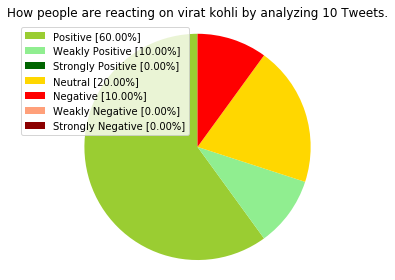

In [12]:
if __name__== "__main__":
    sa = SentimentAnalysis()
    sa.DownloadData()

In [21]:
p = "Not only does Amazon have great products but their Customer Service for the most part is wonderful. Although most times you are outsourced to a different country, I personally have found that when I call it's either South Africa or Philippines and they speak so well, understand me and my NY accent and are quite nice. Let’s face it. Most times you are calling CS with a problem or issue. These agents have to listen to 8 hours of complaints so they themselves need a break. No matter how annoyed I am I try to be on my best behavior and as nice as can be because they too need a break with how nasty we as a society can be."
analysis = TextBlob(p)
print(analysis.sentiment)

Sentiment(polarity=0.3153846153846154, subjectivity=0.7115384615384616)
